Работу выполнила Слободчикова Юлия Алексеевна, студентка группы ИУ5-64б

Вариант 18, задание 3, датасет 2. 

**Задание** Для заданного набора данных произведите масштабирование данных (для одного признака) и преобразование категориальных признаков в количественные двумя способами (label encoding, one hot encoding) для одного признака. Какие методы Вы использовали для решения задачи и почему? Для произвольной колонки данных построить график "Скрипичная диаграмма (violin plot)"

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [3]:
# Будем анализировать данные только на обучающей выборке
data = pd.read_csv('dc-wikia-data.csv', sep = ',')

In [4]:
data.shape

(6896, 13)

In [5]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 6896


In [6]:
# типы колонок
data.dtypes

In [7]:
# Первые 5 строк датасета
data.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1565.0,"1959, October",1959.0
3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,NaN,Living Characters,1316.0,"1987, February",1987.0
4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1237.0,"1940, April",1940.0


In [8]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка APPEARANCES. Тип данных float64. Количество пустых значений 355, 5.15%.
Колонка YEAR. Тип данных float64. Количество пустых значений 69, 1.0%.


Выполним масштабирование колонки "Appearances" - кол-во появлений персонажей. Будем использовать метод MinMax

In [9]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [11]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['APPEARANCES']])

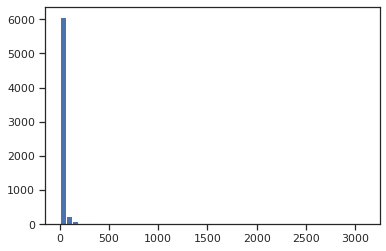

In [12]:
plt.hist(data['APPEARANCES'], 50)
plt.show()

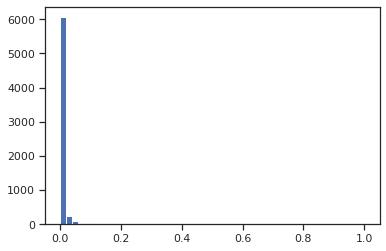

In [13]:
plt.hist(sc1_data, 50)
plt.show()

Выполним преобразование категориальных признаков в количественные

In [15]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [14]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка ID. Тип данных object. Количество пустых значений 2013, 29.19%.
Колонка ALIGN. Тип данных object. Количество пустых значений 601, 8.72%.
Колонка EYE. Тип данных object. Количество пустых значений 3628, 52.61%.
Колонка HAIR. Тип данных object. Количество пустых значений 2274, 32.98%.
Колонка SEX. Тип данных object. Количество пустых значений 125, 1.81%.
Колонка GSM. Тип данных object. Количество пустых значений 6832, 99.07%.
Колонка ALIVE. Тип данных object. Количество пустых значений 3, 0.04%.
Колонка FIRST APPEARANCE. Тип данных object. Количество пустых значений 69, 1.0%.


Для преобразования возьмем колонку First APPEARANCE. Для этой колонки лучше всего использовать Label Encoding, так как это колонки отражают даты, то есть в них есть порядок. 

In [16]:
#Для начала заполним пропущенные данные 
cat_temp_data = data[['FIRST APPEARANCE']]
cat_temp_data.head()

,FIRST APPEARANCE
0,"1939, May"
1,"1986, October"
2,"1959, October"
3,"1987, February"
4,"1940, April"


In [17]:
cat_temp_data['FIRST APPEARANCE'].unique()

In [18]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [19]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

In [20]:
cat_enc = pd.DataFrame({'c1':data_imp2.T[0]})
cat_enc

,c1
0,"1939, May"
1,"1986, October"
2,"1959, October"
3,"1987, February"
4,"1940, April"
...,...
6891,"2010, December"
6892,"2010, December"
6893,"2010, December"
6894,"2010, December"


In [21]:
cat_enc['c1'].unique()

In [22]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])

In [23]:
le.classes_

In [24]:
np.unique(cat_enc_le)

Для этой колонки однозначно не пододет One-Hot encoding, так как в данных изначально уже есть порядок и присутсует очень много уникальных значений. Для метода One-Hot encoding лучше подойжет колонка SEX 

In [25]:
#Для начала заполним пропущенные данные 
cat_temp_data2 = data[['SEX']]
cat_temp_data2.head()

,SEX
0,Male Characters
1,Male Characters
2,Male Characters
3,Male Characters
4,Male Characters


In [26]:
cat_temp_data2['SEX'].unique()

In [27]:
# Импьютация наиболее частыми значениями
imp4 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp4 = imp4.fit_transform(cat_temp_data2)
data_imp4

In [28]:
cat_enc4 = pd.DataFrame({'c2':data_imp4.T[0]})
cat_enc4

,c2
0,Male Characters
1,Male Characters
2,Male Characters
3,Male Characters
4,Male Characters
...,...
6891,Female Characters
6892,Male Characters
6893,Male Characters
6894,Male Characters


In [29]:
pd.get_dummies(cat_enc4).head()

,c2_Female Characters,c2_Genderless Characters,c2_Male Characters,c2_Transgender Characters
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [31]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc4[['c2']])

In [32]:
cat_enc_ohe

<6896x4 sparse matrix of type '<class 'numpy.float64'>'
	with 6896 stored elements in Compressed Sparse Row format>

In [33]:
cat_enc_ohe.todense()[0:10]

**Построение скрипичной диаграммы**

In [34]:
import seaborn as sns

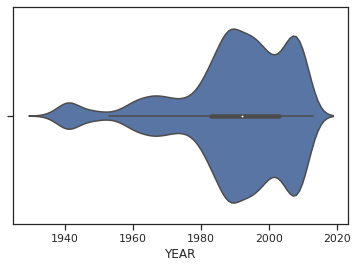

In [35]:
sns.violinplot(x=data['YEAR'])

/opt/python/envs/default/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


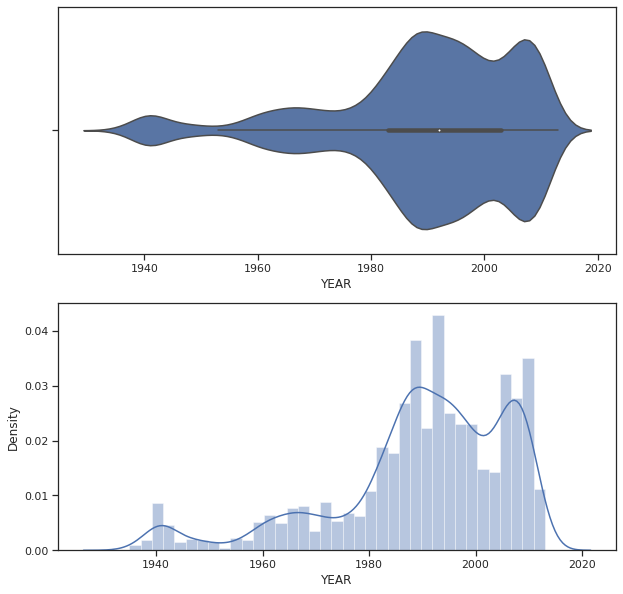

In [37]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
sns.violinplot(ax=ax[0], x=data['YEAR'])
sns.distplot(data['YEAR'], ax=ax[1])

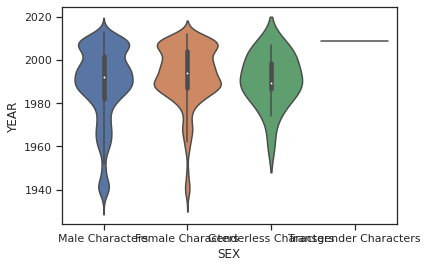

In [38]:
# Распределение параметра YEAR сгруппированные по SEX.
sns.violinplot(x='SEX', y='YEAR', data=data)